In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates


#Load modified plant 2 datasets
P2=pd.read_csv('archive/Plant2_summed_dataset.csv',na_values= '?')
# display(P2)

P2 = P2[['DATE_TIME', 'AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]
display(P2)



,DATE_TIME,AC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,0.0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,0.0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,0.0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,0.0,26.596148,25.088210,0.0
...,...,...,...,...,...
3254,2020-06-17 22:45:00,0.0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,0.0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,0.0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,0.0,23.291048,22.373909,0.0


In [45]:
feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
# feature_names=['DATE_TIME', 'AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']
X = P2[feature_names]
y = P2['AC_POWER']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6/34, shuffle=False)

# See that the data is split properly in time. Can add "DATE_TIME" t ofeatures, to verify.
display(X_train)
display(X_test)

#Making scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#Fitting scaler to the data
scaler.fit(X_test)

#Transform the data to normal distributions
X_test=pd.DataFrame(scaler.transform(X_test))
X_train=pd.DataFrame(scaler.transform(X_train))

display(X_test)



,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,27.004764,25.060789,0.0
1,26.880811,24.421869,0.0
2,26.682055,24.427290,0.0
3,26.500589,24.420678,0.0
4,26.596148,25.088210,0.0
...,...,...,...
2678,23.090081,21.662188,0.0
2679,23.077111,21.622833,0.0
2680,23.062494,21.668886,0.0
2681,22.998344,21.650674,0.0


,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2683,23.096334,21.819370,0.0
2684,23.073426,21.868107,0.0
2685,23.198418,21.921284,0.0
2686,23.259188,21.790160,0.0
2687,23.268280,22.156883,0.0
...,...,...,...
3254,23.511703,22.856201,0.0
3255,23.482282,22.744190,0.0
3256,23.354743,22.492245,0.0
3257,23.291048,22.373909,0.0


,0,1,2
0,-1.078654,-0.959122,-0.750711
1,-1.087364,-0.952811,-0.750711
2,-1.039840,-0.945925,-0.750711
3,-1.016735,-0.962904,-0.750711
4,-1.013278,-0.915416,-0.750711
...,...,...,...
571,-0.920725,-0.824858,-0.750711
572,-0.931911,-0.839363,-0.750711
573,-0.980404,-0.871989,-0.750711
574,-1.004621,-0.887312,-0.750711


In [47]:
# import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
# X = np.array([[4, 5, 6, 1, 0, 2], [3.1, 3.5, 1.0, 2.1, 8.3, 1.1]]).T
# y = np.array([1, 6, 7, 1, 2, 3])

# model = xgb.XGBRegressor()
param_search = {'max_depth' : [3, 5]}

tscv = TimeSeriesSplit(n_splits=2)
gsearch = GridSearchCV(estimator=model, cv=tscv,
                        param_grid=param_search)
gsearch.fit(X, y)

NameError: name 'model' is not defined

In [54]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(min_impurity_decrease=0.0, max_depth=None,  random_state=42)
dtr.fit(X_train,y_train)

dtr_score = dtr.score(X_test, y_test)
print(f"Score is {dtr_score*100:.4f} %")


# from sklearn.tree import plot_tree
# plt.figure(figsize=(10, 3), dpi=300)
# tree_dot = plot_tree(dtr, feature_names=feature_names) # Takes >2min to plot


from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
param_grid = {'min_impurity_decrease': range(0, 15), 'max_depth': range(2, 10), } 
    # Note that it will always be advantageously to minimize "min_impurity_decrease" and maximize "max_depth".
tscv = TimeSeriesSplit(n_splits=7)
dtr2 = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(dtr2, param_grid=param_grid, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))


Score is 89.2527 %
{'max_depth': 2, 'min_impurity_decrease': 0}
0.872074924516304


In [52]:
results = pd.DataFrame(grid.cv_results_)
display(results)

display(results[['params','mean_test_score','mean_train_score']])


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_impurity_decrease,params,split0_test_score,split1_test_score,split2_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.008931,0.001730,0.004684,0.004865,2,0,"{'max_depth': 2, 'min_impurity_decrease': 0}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
1,0.013428,0.013030,0.003613,0.001708,2,1,"{'max_depth': 2, 'min_impurity_decrease': 1}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
2,0.004524,0.001147,0.002439,0.000420,2,2,"{'max_depth': 2, 'min_impurity_decrease': 2}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
3,0.005021,0.000973,0.003007,0.001562,2,3,"{'max_depth': 2, 'min_impurity_decrease': 3}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
4,0.004593,0.001428,0.001793,0.000597,2,4,"{'max_depth': 2, 'min_impurity_decrease': 4}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.007395,0.001860,0.002794,0.000454,9,10,"{'max_depth': 9, 'min_impurity_decrease': 10}",0.625718,0.805591,0.912747,...,106,0.999257,0.983457,0.968459,0.967409,0.966219,0.960165,0.944190,0.969879,0.016139
116,0.007871,0.003037,0.002577,0.000688,9,11,"{'max_depth': 9, 'min_impurity_decrease': 11}",0.625698,0.805591,0.912747,...,108,0.999256,0.983457,0.968459,0.967409,0.966219,0.960164,0.944189,0.969879,0.016139
117,0.008599,0.005166,0.002575,0.000410,9,12,"{'max_depth': 9, 'min_impurity_decrease': 12}",0.625698,0.805591,0.912749,...,109,0.999256,0.983457,0.968459,0.967408,0.966218,0.960164,0.944188,0.969878,0.016139
118,0.007581,0.001017,0.002947,0.001565,9,13,"{'max_depth': 9, 'min_impurity_decrease': 13}",0.625698,0.808342,0.912749,...,110,0.999256,0.983456,0.968458,0.967408,0.966218,0.960163,0.944187,0.969878,0.016139


,params,mean_test_score,mean_train_score
0,"{'max_depth': 2, 'min_impurity_decrease': 0}",0.859536,0.905553
1,"{'max_depth': 2, 'min_impurity_decrease': 1}",0.859536,0.905553
2,"{'max_depth': 2, 'min_impurity_decrease': 2}",0.859536,0.905553
3,"{'max_depth': 2, 'min_impurity_decrease': 3}",0.859536,0.905553
4,"{'max_depth': 2, 'min_impurity_decrease': 4}",0.859536,0.905553
...,...,...,...
115,"{'max_depth': 9, 'min_impurity_decrease': 10}",0.815882,0.969879
116,"{'max_depth': 9, 'min_impurity_decrease': 11}",0.814251,0.969879
117,"{'max_depth': 9, 'min_impurity_decrease': 12}",0.813705,0.969878
118,"{'max_depth': 9, 'min_impurity_decrease': 13}",0.813702,0.969878


                                            params  mean_test_score  \
0     {'max_depth': 2, 'min_impurity_decrease': 0}         0.859536   
1     {'max_depth': 2, 'min_impurity_decrease': 1}         0.859536   
2     {'max_depth': 2, 'min_impurity_decrease': 2}         0.859536   
3     {'max_depth': 2, 'min_impurity_decrease': 3}         0.859536   
4     {'max_depth': 2, 'min_impurity_decrease': 4}         0.859536   
..                                             ...              ...   
115  {'max_depth': 9, 'min_impurity_decrease': 10}         0.815882   
116  {'max_depth': 9, 'min_impurity_decrease': 11}         0.814251   
117  {'max_depth': 9, 'min_impurity_decrease': 12}         0.813705   
118  {'max_depth': 9, 'min_impurity_decrease': 13}         0.813702   
119  {'max_depth': 9, 'min_impurity_decrease': 14}         0.813348   

     mean_train_score  
0            0.905553  
1            0.905553  
2            0.905553  
3            0.905553  
4            0.905553  
.. 

In [56]:

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200, min_impurity_decrease=0.0, max_depth=None,  random_state=42, n_jobs=-1)
rfr.fit(X_train,y_train)

rfr_score = rfr.score(X_test, y_test)
print(f"Score is {rfr_score*100:.4f} %")




# param_grid = {'min_impurity_decrease': range(0, 15), 'max_depth': range(2, 10), } 
#     # Note that it will always be advantageously to minimize "min_impurity_decrease" and maximize "max_depth".
# tscv = TimeSeriesSplit(n_splits=7)
# dtr2 = DecisionTreeRegressor(random_state=42)
# grid = GridSearchCV(dtr2, param_grid=param_grid, cv=tscv, return_train_score=True, n_jobs=-1)
# grid.fit(X_train, y_train)
# print(grid.best_params_)
# print(grid.score(X_test, y_test))


param_grid_tree = {'n_estimators': range(2,20,2)}
rfr2 = RandomForestRegressor(min_impurity_decrease=15-5, max_depth=7+5, random_state=42)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))


Score is 88.2935 %
{'n_estimators': 18}
0.8846668795139662


0    0.821914
1    0.832431
2    0.836088
3    0.837199
4    0.840096
5    0.840569
6    0.841048
7    0.840987
8    0.842222
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.022875,0.015072,0.005085,0.001369,2,{'n_estimators': 2},0.622929,0.888093,0.887611,0.865640,...,9,0.995752,0.968122,0.970209,0.970426,0.955637,0.959778,0.952829,0.967536,0.013256
1,0.039965,0.032200,0.006378,0.003789,4,{'n_estimators': 4},0.627428,0.873359,0.913107,0.855977,...,8,0.996582,0.974895,0.979620,0.976713,0.969539,0.967690,0.960177,0.975031,0.010644
2,0.038340,0.009203,0.005801,0.001914,6,{'n_estimators': 6},0.616116,0.887096,0.916671,0.859785,...,7,0.996708,0.979060,0.981759,0.979878,0.972769,0.969277,0.963621,0.977582,0.009840
3,0.049395,0.015587,0.005737,0.001429,8,{'n_estimators': 8},0.618790,0.886549,0.915334,0.861939,...,6,0.997109,0.983055,0.983207,0.980710,0.975388,0.973655,0.966936,0.980008,0.008824
4,0.073565,0.024647,0.007370,0.001283,10,{'n_estimators': 10},0.619912,0.883568,0.916375,0.866802,...,5,0.997366,0.983933,0.984500,0.983133,0.977754,0.976060,0.969081,0.981690,0.008167
5,0.077535,0.018782,0.007790,0.002746,12,{'n_estimators': 12},0.621261,0.879584,0.918347,0.869781,...,4,0.997250,0.984777,0.985588,0.983823,0.978541,0.976844,0.969442,0.982323,0.008036
6,0.097094,0.053273,0.006503,0.002129,14,{'n_estimators': 14},0.619918,0.887172,0.922204,0.866442,...,2,0.997246,0.984738,0.985557,0.984043,0.979227,0.976946,0.970242,0.982571,0.007801
7,0.082039,0.024699,0.006880,0.000922,16,{'n_estimators': 16},0.613974,0.886437,0.923059,0.868347,...,3,0.997330,0.985824,0.985476,0.983576,0.979066,0.977196,0.970195,0.982666,0.007857
8,0.094970,0.027668,0.006017,0.001092,18,{'n_estimators': 18},0.617050,0.885739,0.924021,0.870661,...,1,0.997280,0.985855,0.985561,0.983578,0.979203,0.977465,0.970269,0.982744,0.007798


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_26436\562657808.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_n_estimators.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_26436\562657808.py:10: DeprecationWarning: `np.int` is a deprecated 

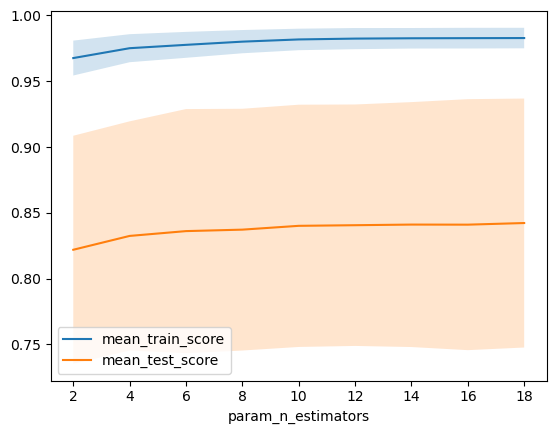

In [58]:
results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_n_estimators', 'mean_train_score')
results.plot('param_n_estimators', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_n_estimators.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_estimators.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()